<a href="https://colab.research.google.com/github/Prattoypaul/deeplearning/blob/machinel/transferlearning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi


NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os,cv2
import tensorflow as tf

In [3]:
import PIL.Image as img
import tensorflow_hub as hub
from tensorflow import keras

In [4]:
from tensorflow.keras import layers,models


In [5]:
!pip install tensorflow-hub

In [6]:
IMAGE_SHAPE=(224,224)
classification=tf.keras.Sequential([
                                    hub.KerasLayer('https://tfhub.dev/google/tf2-preview/inception_v3/classification/4',input_shape=IMAGE_SHAPE+(3,))
])

In [7]:
gold_fish=img.open('/content/drive/MyDrive/Colab Notebooks/transferlearning/depositphotos_5121815-stock-photo-gold-fish.jpg').resize(IMAGE_SHAPE)

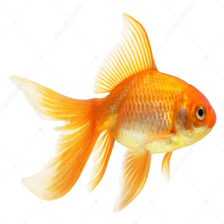

In [8]:
gold_fish

In [9]:
gold_fish=np.array(gold_fish)/255
gold_fish.shape

(224, 224, 3)

In [10]:
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [11]:
np.argmax(classification.predict(gold_fish[np.newaxis, ...]))

2

In [12]:
img_label=[]
with open('/content/drive/MyDrive/Colab Notebooks/transferlearning/mybook.txt','r') as f:
  img_label=f.read().splitlines()


In [13]:
img_label[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [14]:
img_label[2]

'goldfish'

In [15]:
datadir='/content/drive/MyDrive/Colab Notebooks/new_project_flower/flower_photos'

In [16]:
import pathlib

In [17]:
datadir=pathlib.Path(datadir)

In [18]:
list(datadir.glob('*/*.jpg'))[:5]

[PosixPath('/content/drive/MyDrive/Colab Notebooks/new_project_flower/flower_photos/dandelion/8915661673_9a1cdc3755_m.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/new_project_flower/flower_photos/dandelion/8740218495_23858355d8_n.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/new_project_flower/flower_photos/dandelion/4510350093_3700064215.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/new_project_flower/flower_photos/dandelion/2608937632_cfd93bc7cd.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/new_project_flower/flower_photos/dandelion/3539077354_c67aa7168d_m.jpg')]

In [19]:
img_count=len(list(datadir.glob('*/*.jpg')))

In [20]:
roses=list(datadir.glob('roses/*.jpg'))

In [21]:
roses[0]

PosixPath('/content/drive/MyDrive/Colab Notebooks/new_project_flower/flower_photos/roses/7409458444_0bfc9a0682_n.jpg')

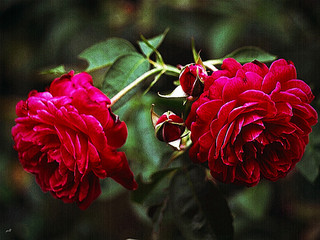

In [22]:
img.open(str(roses[9]))

In [23]:
flower_img_dict={
    'roses':list(datadir.glob('roses/*.jpg')),
    'daisy':list(datadir.glob('daisy/*.jpg')),
    'dandelion':list(datadir.glob('dandelion/*.jpg')),
    'sunflowers':list(datadir.glob('sunflowers/*.jpg')),
    'tulips':list(datadir.glob('tulips/*.jpg'))
}

In [24]:
imge=cv2.imread(str(flower_img_dict['dandelion'][9]))

In [25]:
imge.shape

(254, 320, 3)

In [26]:

flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [27]:
x=[]
y=[]
for f_name,imga in flower_img_dict.items():
  for im in imga:
    pic=cv2.imread(str(im))
    resizepic=cv2.resize(pic,(224,224))
    x.append(resizepic)
    y.append(flowers_labels_dict[f_name])

In [28]:
x=np.array(x)
y=np.array(y)

In [29]:
x=x/255

In [30]:
from sklearn.model_selection import train_test_split


In [31]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=43)

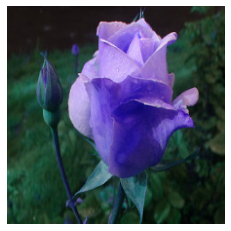

In [32]:
plt.axis('off')
plt.imshow(x[8])

In [33]:
predict=classification.predict(np.array([x[1],x[4],x[54]]))
predict=np.argmax(predict,axis=1)
predict

array([946, 553, 646])

In [34]:
img_label[946]

'bell pepper'

In [35]:
img_label[553]

'feather boa'

In [36]:
img_label[646]

'maypole'

In [37]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [38]:
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [39]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [40]:

model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(xtrain, ytrain, epochs=5)

Epoch 1/5
81/81 [==============================] - 70s 810ms/step - loss: 0.8532 - acc: 0.6789
Epoch 2/5
81/81 [==============================] - 65s 806ms/step - loss: 0.4111 - acc: 0.8634
Epoch 3/5
81/81 [==============================] - 65s 806ms/step - loss: 0.3177 - acc: 0.8957
Epoch 4/5
81/81 [==============================] - 65s 803ms/step - loss: 0.2601 - acc: 0.9221
Epoch 5/5
81/81 [==============================] - 65s 807ms/step - loss: 0.2261 - acc: 0.9350


In [41]:
model.evaluate(xtest,ytest)

35/35 [==============================] - 29s 803ms/step - loss: 0.3997 - acc: 0.8592


[0.3997360169887543, 0.8592188954353333]